In [6]:
import logging
logging.basicConfig(level=logging.WARNING)

import os
import torch

import auditory_cortex.models as Reg
from deepspeech_pytorch.model import DeepSpeech
import deepspeech_pytorch.loader.data_loader as data_loader
from deepspeech_pytorch.configs.train_config import SpectConfig

import matplotlib.pylab as plt
%matplotlib inline

# checkpoint_path = '/depot/jgmakin/data/auditory_cortex/pretrained_weights/deepspeech2/librispeech_pretrained_v3.ckpt'

In [12]:
model = 'deepspeech2'
obj = Reg.Regression(model, load_features=False)

sent = 12
aud = obj.dataset.audio(sent=sent)

Loading Neural data for session: 180810 ... Done.
Creating regression obj for: 'deepspeech2'


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (WordErrorRate). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.p

In [5]:
import os
from auditory_cortex import pretrained_dir

audio_config = SpectConfig()
parser = data_loader.AudioParser(audio_config, normalize=True)
spect = parser.compute_spectrogram(aud)

spect = spect.unsqueeze(dim=0)
spect = spect.unsqueeze(dim=0)



checkpoint_path = os.path.join(pretrained_dir, 'deepspeech2', 'librispeech_pretrained_v3.ckpt')
# checkpoint_path = '/depot/jgmakin/data/auditory_cortex/pretrained_weights/deepspeech2/librispeech_pretrained_v3.ckpt'
model = DeepSpeech.load_from_checkpoint(checkpoint_path=checkpoint_path)

print("About to forward pass thru the network...")
lengths = torch.tensor([spect.shape[-1]], dtype=torch.int64)
out = model(spect, lengths)

print("Done with forward pass thru the network")

print("Do nothing, just print this...!")


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (WordErrorRate). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.p

About to forward pass thru the network...
Done with forward pass thru the network
Do nothing, just print this...!


In [7]:
output, output_sizes, *_ = out
 

In [9]:
decoded_output, _ = model.evaluation_decoder.decode(output, output_sizes)

In [10]:
decoded_output

[['HAVE YOU GOT ENOUGH BLANKETS']]

In [11]:
spect.shape

torch.Size([1, 1, 161, 137])

In [3]:
import torch
fs = 16000
input_duration = 1000
samples = int(fs*input_duration/1000)
# if starting_sent == 0:
inp = torch.randn(samples, dtype=torch.float32)

In [8]:
audio_config = SpectConfig()
parser = data_loader.AudioParser(audio_config, normalize=True)

inp = parser.compute_spectrogram(inp.cpu().numpy())
# inp = self.linear_model.model_extractor.extractor.get_spectrogram(inp)

In [9]:
inp.shape

torch.Size([161, 101])

In [10]:
inp = inp.unsqueeze(dim=0)

In [11]:
inp.shape


torch.Size([1, 161, 101])

In [14]:
inp.dtype

torch.float32

In [16]:
if torch.is_tensor(inp):
    print("yes")

yes


In [13]:
obj.model_extractor.translate(inp, grad=True)

(tensor([[[9.0870e-01, 1.2289e-04, 6.9568e-03,  ..., 9.8968e-03,
           9.6794e-06, 1.4120e-03],
          [9.5857e-01, 1.7078e-04, 1.9377e-02,  ..., 2.4727e-04,
           9.9888e-07, 4.3476e-03],
          [4.7632e-01, 3.9604e-05, 1.4867e-03,  ..., 1.7427e-02,
           1.7883e-04, 2.6129e-04],
          ...,
          [4.7014e-01, 6.3436e-04, 7.8252e-03,  ..., 1.4521e-03,
           1.7142e-03, 1.2729e-03],
          [6.5977e-01, 1.3220e-03, 6.5780e-03,  ..., 2.4745e-03,
           2.3362e-04, 2.3796e-04],
          [3.7478e-01, 8.3427e-05, 1.8380e-03,  ..., 5.6806e-02,
           2.5972e-04, 4.6081e-04]]], grad_fn=<SoftmaxBackward0>),
 tensor([51], dtype=torch.int32),
 [(tensor([[[-2.2471e-01, -3.3816e-03,  4.9470e-03,  ...,  4.0576e-03,
              2.7737e-05, -2.2358e-04]],
   
           [[ 6.2965e-05,  7.6742e-03, -3.1706e-05,  ...,  2.7542e-01,
             -1.3644e-02,  7.1212e-01]]], grad_fn=<StackBackward0>),
   tensor([[[-1.7200e+00, -3.7584e-01,  3.1145e-02,  ..., 

In [13]:
from auditory_cortex.utils import SyntheticInputUtils

spec = SyntheticInputUtils.get_spectrogram(aud)

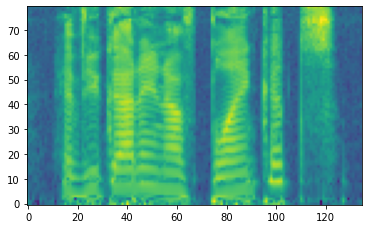

In [22]:
plt.imshow(spec.transpose(0,1), origin='lower')

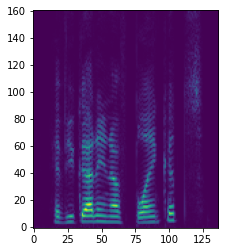

In [26]:
plt.imshow(spect.squeeze(), origin='lower')

In [24]:
spec.shape

torch.Size([135, 80])

In [6]:
obj.dataset.duration(sent=sent)

1.369625

In [7]:
inp = obj.model_extractor.translate(aud)

(21914,)
torch.Size([161, 137])


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [21]:
layer = 2
feats0 = obj.model_extractor.get_features(layer)
feats0.shape


torch.Size([69, 2048])

In [13]:
# feats0[1][0][0].shape
feats0.shape

torch.Size([69, 2592])

In [11]:
type(feats0[1][0])

torch.Tensor

In [21]:
feats0[0].data[:,1024:].shape

torch.Size([69, 1024])

In [6]:
layer = 2
feats0 = obj.model_extractor.get_features(layer)
feats0.shape

torch.Size([69, 2048])

In [20]:
feats0.reshape(feats0.shape[0]*feats0.shape[1], -1)

torch.Size([2592, 69])

In [7]:
obj.model_extractor.features.keys()

dict_keys(['conv.seq_module.2', 'conv.seq_module.5', 'rnns.0.rnn', 'rnns.1.rnn', 'rnns.2.rnn', 'rnns.3.rnn', 'rnns.4.rnn'])

In [7]:
feats0 = obj.model_extractor.get_features(0)

In [11]:
feats0.data.shape

torch.Size([69, 2048])

In [3]:

audio_config = SpectConfig()
parser = data_loader.AudioParser(audio_config, normalize=True)
spect = parser.compute_spectrogram(aud)

In [6]:
spect = spect.unsqueeze(dim=0)
spect = spect.unsqueeze(dim=0)
spect.shape

torch.Size([1, 1, 161, 137])

In [8]:
lengths = torch.tensor(spect.shape[-1], dtype=torch.int64)

In [9]:
lengths

tensor(137)

In [2]:
checkpoint_path = '/depot/jgmakin/data/auditory_cortex/pretrained_weights/deepspeech2/librispeech_pretrained_v3.ckpt'
model = DeepSpeech.load_from_checkpoint(checkpoint_path=checkpoint_path)

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (WordErrorRate). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.p

### getting started with DeepSpeech2

In [2]:
model = DeepSpeech.load_from_checkpoint(checkpoint_path=checkpoint_path)

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (WordErrorRate). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.p

In [4]:
type(model)

deepspeech_pytorch.model.DeepSpeech

In [5]:
print(model)

DeepSpeech(
  (conv): MaskConv(
    (seq_module): Sequential(
      (0): Conv2d(1, 32, kernel_size=(41, 11), stride=(2, 2), padding=(20, 5))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Hardtanh(min_val=0, max_val=20, inplace=True)
      (3): Conv2d(32, 32, kernel_size=(21, 11), stride=(2, 1), padding=(10, 5))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Hardtanh(min_val=0, max_val=20, inplace=True)
    )
  )
  (rnns): Sequential(
    (0): BatchRNN(
      (rnn): LSTM(1312, 1024, bidirectional=True)
    )
    (1): BatchRNN(
      (batch_norm): SequenceWise (
      BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
      (rnn): LSTM(1024, 1024, bidirectional=True)
    )
    (2): BatchRNN(
      (batch_norm): SequenceWise (
      BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
      (rnn): LSTM(1024, 1024, bidi

In [7]:
dict([*model.named_modules()])['conv.seq_module.2']

Hardtanh(min_val=0, max_val=20, inplace=True)

In [9]:
dict([*model.named_modules()])['rnns']

Sequential(
  (0): BatchRNN(
    (rnn): LSTM(1312, 1024, bidirectional=True)
  )
  (1): BatchRNN(
    (batch_norm): SequenceWise (
    BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
    (rnn): LSTM(1024, 1024, bidirectional=True)
  )
  (2): BatchRNN(
    (batch_norm): SequenceWise (
    BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
    (rnn): LSTM(1024, 1024, bidirectional=True)
  )
  (3): BatchRNN(
    (batch_norm): SequenceWise (
    BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
    (rnn): LSTM(1024, 1024, bidirectional=True)
  )
  (4): BatchRNN(
    (batch_norm): SequenceWise (
    BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
    (rnn): LSTM(1024, 1024, bidirectional=True)
  )
)